# Data
We are going to explore basic data about mileage per gallon performances of various cars. That data can be download from [Kaggle](https://www.kaggle.com/uciml/autompg-dataset).

It contains the following attributes:
- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: string (unique for each instance)

Finally it must be highlighted that in the column horsepower there will be 6 missing values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

There are 398 rows and 9 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


We want to show the real Year when a model was introduced.

In [5]:
df.rename(columns={"model year":"Year"}, inplace=True)
df.columns = list(map(str.capitalize,df.columns))
df["Year"] = df["Year"]+1900
df.sample(5)

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Car name
64,15.0,8,318.0,150,4135,13.5,1972,1,plymouth fury iii
134,16.0,6,258.0,110,3632,18.0,1974,1,amc matador
241,22.0,6,146.0,97,2815,14.5,1977,3,datsun 810
12,15.0,8,400.0,150,3761,9.5,1970,1,chevrolet monte carlo
277,16.2,6,163.0,133,3410,15.8,1978,2,peugeot 604sl


We want to separe the name of model and the manufacturer from the column car name

In [6]:
df["Car name"].str.split(" ", 1, expand=True).head(2)

,0,1
0,chevrolet,chevelle malibu
1,buick,skylark 320


In [7]:
df[["Manufacturer", "Model"]] = df["Car name"].str.split(" ", 1, expand=True).rename(columns={0:"Manufacturer", 1:"Model"})
df.drop(columns={"Car name"}, inplace=True)
df.head(2)

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Manufacturer,Model
0,18.0,8,307.0,130,3504,12.0,1970,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,1,buick,skylark 320


In [8]:
df["Manufacturer"] = df["Manufacturer"].str.capitalize()
df["Model"] = df["Model"].str.title()
df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Manufacturer,Model
0,18.0,8,307.0,130,3504,12.0,1970,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165,3693,11.5,1970,1,Buick,Skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,1,Plymouth,Satellite
3,16.0,8,304.0,150,3433,12.0,1970,1,Amc,Rebel Sst
4,17.0,8,302.0,140,3449,10.5,1970,1,Ford,Torino


In [9]:
df["Manufacturer"].unique()

array(['Chevrolet', 'Buick', 'Plymouth', 'Amc', 'Ford', 'Pontiac',
       'Dodge', 'Toyota', 'Datsun', 'Volkswagen', 'Peugeot', 'Audi',
       'Saab', 'Bmw', 'Chevy', 'Hi', 'Mercury', 'Opel', 'Fiat',
       'Oldsmobile', 'Chrysler', 'Mazda', 'Volvo', 'Renault', 'Toyouta',
       'Maxda', 'Honda', 'Subaru', 'Chevroelt', 'Capri', 'Vw',
       'Mercedes-benz', 'Cadillac', 'Mercedes', 'Vokswagen', 'Triumph',
       'Nissan'], dtype=object)

There are some mistakes yet

In [10]:
merc_mask = df["Manufacturer"] == "Mercedes-benz"
merc_mask2 = df["Manufacturer"] == "Mercedes"
vw_mask = df["Manufacturer"] == "Vw"
vw_mask2 = df["Manufacturer"] == "Vokswagen"
amc_mask = df["Manufacturer"] == "Amc"
maz_mask = df["Manufacturer"] == "Maxda"
chev_mask = df["Manufacturer"] == "Chevy"
chev_mask2 = df["Manufacturer"] == "Chevroelt"
hi_mask = df["Manufacturer"] == "Hi"
bmw_mask = df["Manufacturer"] == "Bmw"
toy_mask = df["Manufacturer"] == "Toyouta"

In [11]:
df.loc[(merc_mask) | (merc_mask2), "Manufacturer"] = "Mercedes-Benz"
df.loc[(vw_mask) | (vw_mask2), "Manufacturer"] = "Volkswagen"
df.loc[(amc_mask) , "Manufacturer"] = "AMC"
df.loc[(maz_mask) , "Manufacturer"] = "Mazda"
df.loc[(chev_mask) | (chev_mask2), "Manufacturer"] = "Chevrolet"
df.loc[(hi_mask) ,"Manufacturer"] = "IH"
df.loc[(bmw_mask) ,"Manufacturer"] = "BMW"
df.loc[(toy_mask) ,"Manufacturer"] = "Toyota"
df["Manufacturer"].unique()

array(['Chevrolet', 'Buick', 'Plymouth', 'AMC', 'Ford', 'Pontiac',
       'Dodge', 'Toyota', 'Datsun', 'Volkswagen', 'Peugeot', 'Audi',
       'Saab', 'BMW', 'IH', 'Mercury', 'Opel', 'Fiat', 'Oldsmobile',
       'Chrysler', 'Mazda', 'Volvo', 'Renault', 'Honda', 'Subaru',
       'Capri', 'Mercedes-Benz', 'Cadillac', 'Triumph', 'Nissan'],
      dtype=object)

In [12]:
df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Manufacturer,Model
0,18.0,8,307.0,130,3504,12.0,1970,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165,3693,11.5,1970,1,Buick,Skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,1,Plymouth,Satellite
3,16.0,8,304.0,150,3433,12.0,1970,1,AMC,Rebel Sst
4,17.0,8,302.0,140,3449,10.5,1970,1,Ford,Torino


Wea re going to check if there is a NaN value in our DataFrame

In [13]:
df.isnull().sum()

Mpg             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
Manufacturer    0
Model           2
dtype: int64

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

Mpg             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
Manufacturer    0
Model           0
dtype: int64

Para los valores menores de 10, vemos que se tratan de categorias, nos reducira el uso en memoria de nuestro Dataframe

In [15]:
df.dtypes

Mpg             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Year              int64
Origin            int64
Manufacturer     object
Model            object
dtype: object

In [16]:
df = df.astype({"Manufacturer":"category", "Model":"string"})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Mpg           396 non-null    float64 
 1   Cylinders     396 non-null    int64   
 2   Displacement  396 non-null    float64 
 3   Horsepower    396 non-null    object  
 4   Weight        396 non-null    int64   
 5   Acceleration  396 non-null    float64 
 6   Year          396 non-null    int64   
 7   Origin        396 non-null    int64   
 8   Manufacturer  396 non-null    category
 9   Model         396 non-null    string  
dtypes: category(1), float64(3), int64(4), object(1), string(1)
memory usage: 32.8+ KB


In [18]:
df["Horsepower"].unique() #There are ? value

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [19]:
df = df.loc[~(df["Horsepower"] == "?")]
df["Horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [20]:
df["Horsepower"] = df["Horsepower"].astype("int64")
df.dtypes

Mpg              float64
Cylinders          int64
Displacement     float64
Horsepower         int64
Weight             int64
Acceleration     float64
Year               int64
Origin             int64
Manufacturer    category
Model             string
dtype: object

There a re only one categorical variable, one text variable (we won't use it) and continuos (float) or discrete variables (int)

# Visualization

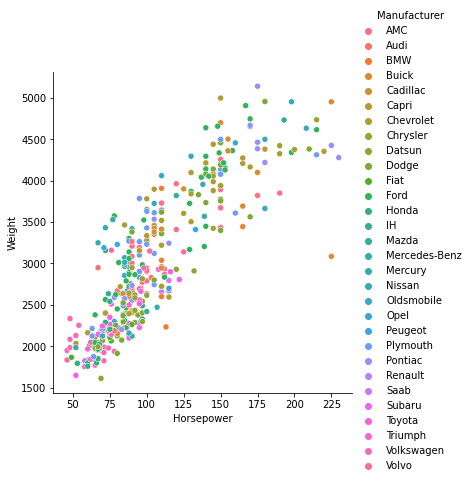

In [21]:
sns.relplot(x="Horsepower", y="Weight", hue="Manufacturer", data=df);

Too many categories, only the Manufacturers with largest number of models in our data

In [48]:
manu = df["Manufacturer"].value_counts()[:8].index.to_list()

In [49]:
df2 = df[df["Manufacturer"].isin(manu)].copy()

In [50]:
#If not categories with 0 values will appear
df2["Manufacturer"] = df2["Manufacturer"].astype("object").astype("category")

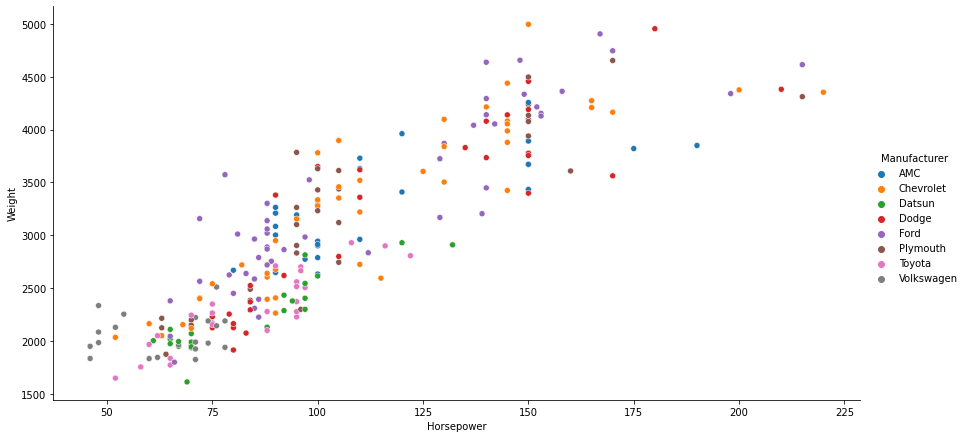

In [52]:
sns.relplot(x="Horsepower", y="Weight", hue="Manufacturer", data=df2, height=6, aspect=2);

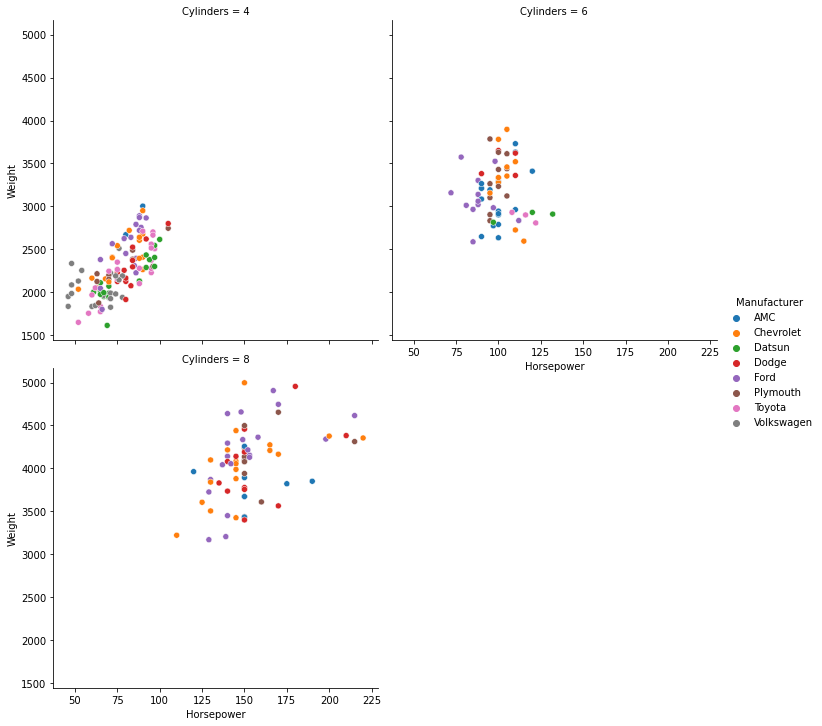

In [54]:
sns.relplot(x="Horsepower", y="Weight", hue="Manufacturer", data=df2, col="Cylinders", col_wrap=2);

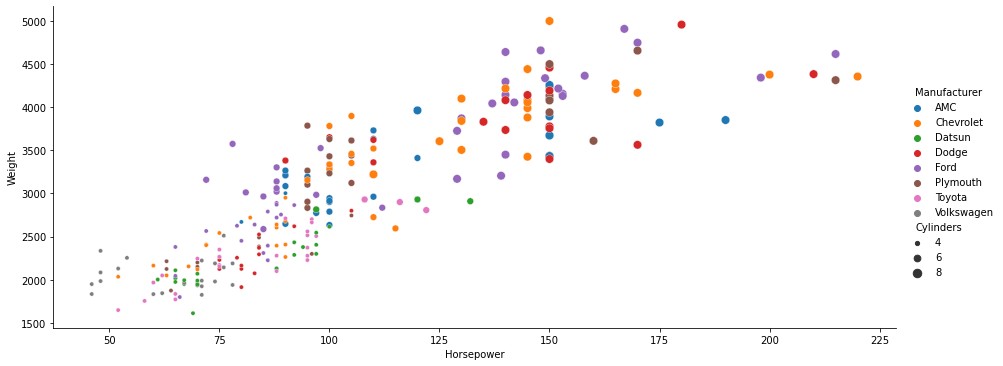

In [58]:
sns.relplot(x="Horsepower", y="Weight", hue="Manufacturer", data=df2, aspect=2.5, size="Cylinders");

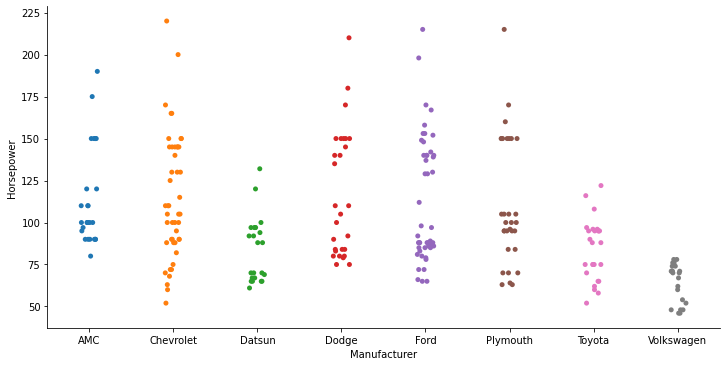

In [60]:
sns.catplot(x="Manufacturer", y="Horsepower", data=df2, aspect= 2);

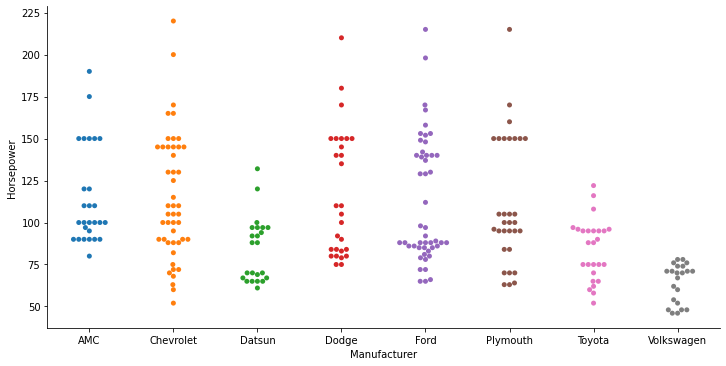

In [61]:
sns.catplot(x="Manufacturer", y="Horsepower", data=df2, kind="swarm", aspect= 2);

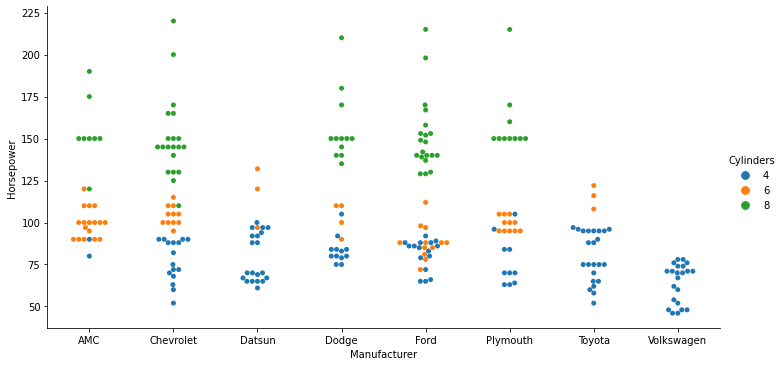

In [63]:
sns.catplot(x="Manufacturer", y="Horsepower", data=df2, kind="swarm", hue="Cylinders", aspect= 2);

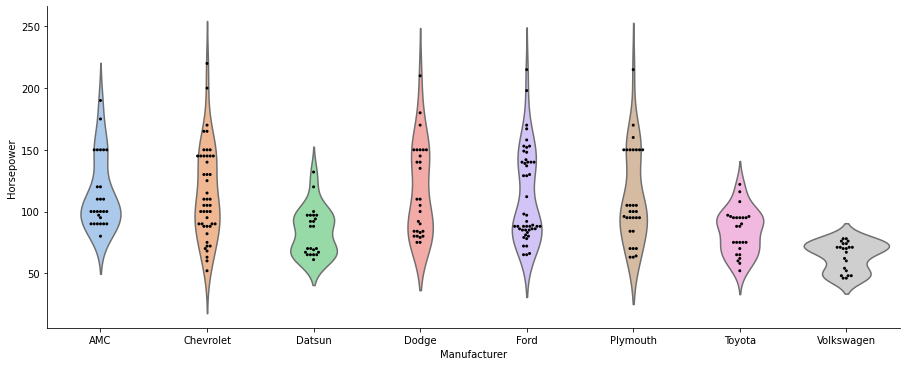

In [72]:
g = sns.catplot(x="Manufacturer", y="Horsepower", kind="violin", inner=None, data=df2, aspect=2.5, palette="pastel")
sns.swarmplot(x="Manufacturer", y="Horsepower", color="k", size=3, data=df2, ax=g.ax);

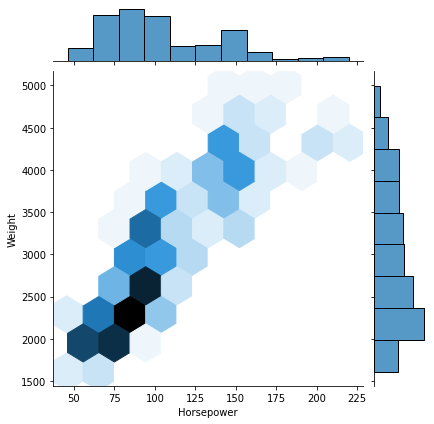

In [75]:
sns.jointplot(x="Horsepower", y="Weight", data=df2, kind="hex");

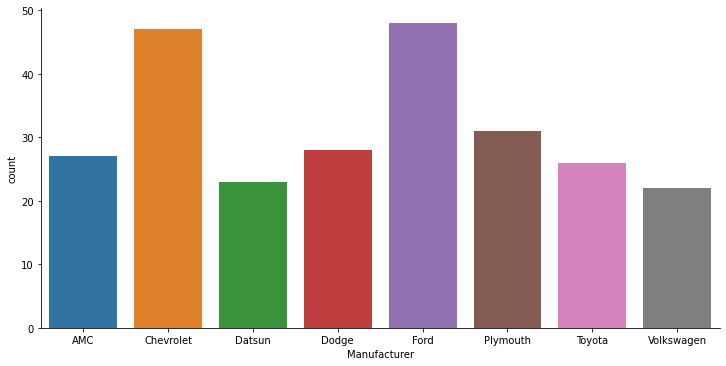

In [77]:
sns.catplot(data=df2, x="Manufacturer", kind='count', aspect= 2);

Order

In [80]:
manu_order = df2.Manufacturer.value_counts().index
manu_order2 = df2.Manufacturer.value_counts(ascending=True).index

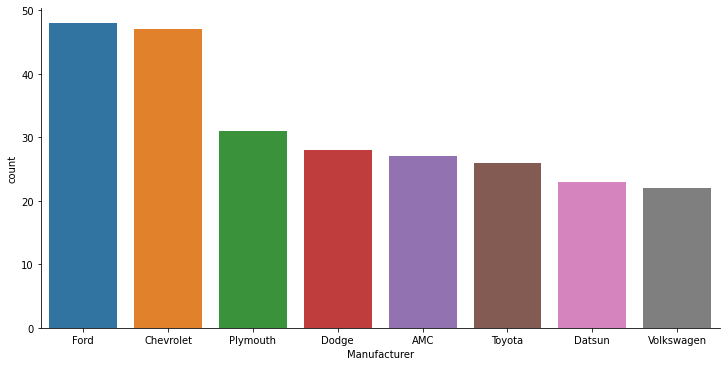

In [82]:
sns.catplot(data=df2, x="Manufacturer", kind='count', aspect= 2, order = manu_order);

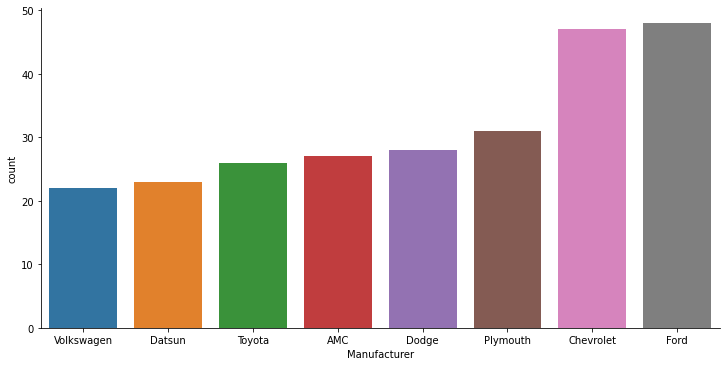

In [83]:
sns.catplot(data=df2, x="Manufacturer", kind='count', aspect= 2, order = manu_order2);